<a href="https://colab.research.google.com/github/soudey123/2024-Summer-Olympics-Data-Analysis/blob/main/2024_Summer_Olympics_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2024 PARIS OLYMPICS: A DEEP DIVE INTO THE DATA**

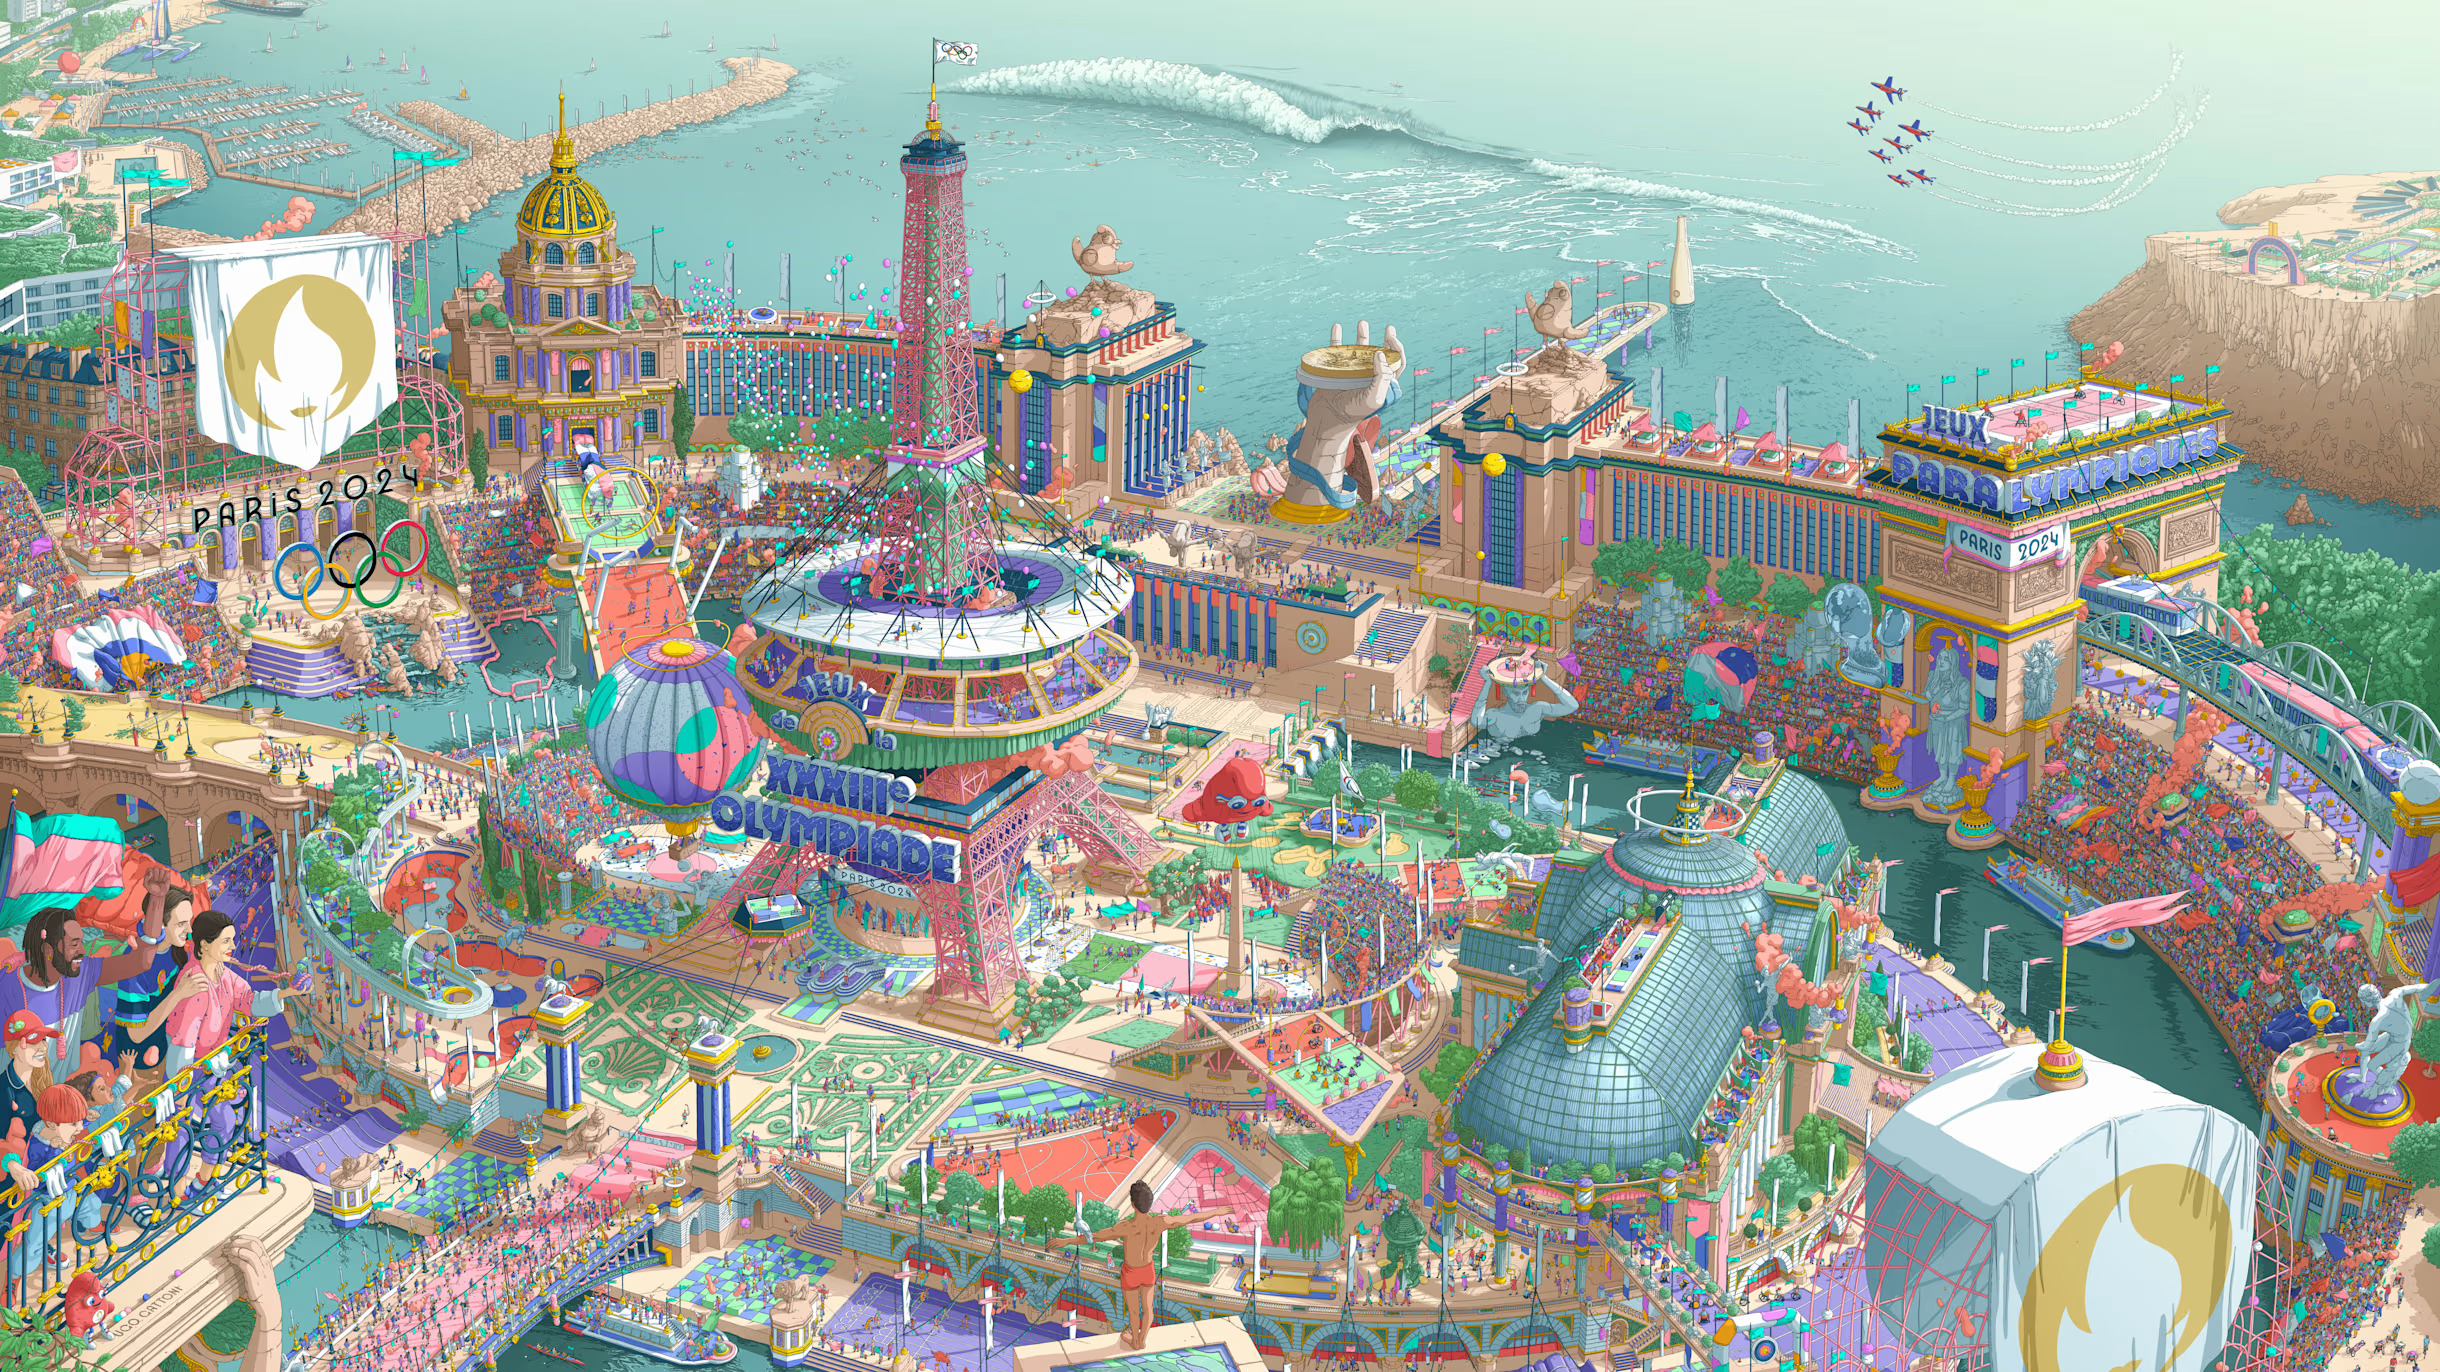

This analysis covers the medal tally by country, identifies the top athletes by total medals within those countries, and reveals the names of these top-performing athletes.


# **Data Overview**
Three datasets are utilized for this analysis:

**medals_total.csv:** Contains aggregated medal data for each country.

**medals.csv:** Provides detailed information about each medal, including the country and the athlete who won it.

**medallists.csv:** Likely contains more detailed information about the athletes themselves, which will be crucial for identifying top performers.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Load the datasets
medals_total_df = pd.read_csv('/content/medals_total.csv')
medals_df = pd.read_csv('/content/medals.csv')
medallists_df = pd.read_csv('/content/medallists.csv')
athletes_df = pd.read_csv('/content/athletes.csv')

# Display the first few rows of each dataset
medals_total_df_head = medals_total_df.head()
medals_df_head = medals_df.head()

medals_total_df_head, medals_df_head


(  country_code  Gold Medal  Silver Medal  Bronze Medal  Total
 0          USA          38            42            42    122
 1          CHN          38            27            24     89
 2          AUS          18            18            14     50
 3          JPN          18            12            13     43
 4          FRA          16            24            22     62,
      medal_type  medal_code  medal_date             name country_code gender  \
 0    Gold Medal           1  2024-07-27  Remco EVENEPOEL          BEL      M   
 1  Silver Medal           2  2024-07-27    Filippo GANNA          ITA      M   
 2  Bronze Medal           3  2024-07-27    Wout van AERT          BEL      M   
 3    Gold Medal           1  2024-07-27      Grace BROWN          AUS      W   
 4  Silver Medal           2  2024-07-27   Anna HENDERSON          GBR      W   
 
      discipline                          event event_type  \
 0  Cycling Road    Men's Individual Time Trial        ATH   
 1  Cycli

**Unique medal counts across disciplines**

This analysis supported by the visualization provides a clearer understanding of how medals are distributed across various sports when accounting for the unique nature of team events by following steps such as identifying the team sports, remove duplicates for team sports, aggregate unique medal counts by discipline and visualize the data accordingly.

<Figure size 1400x1000 with 0 Axes>

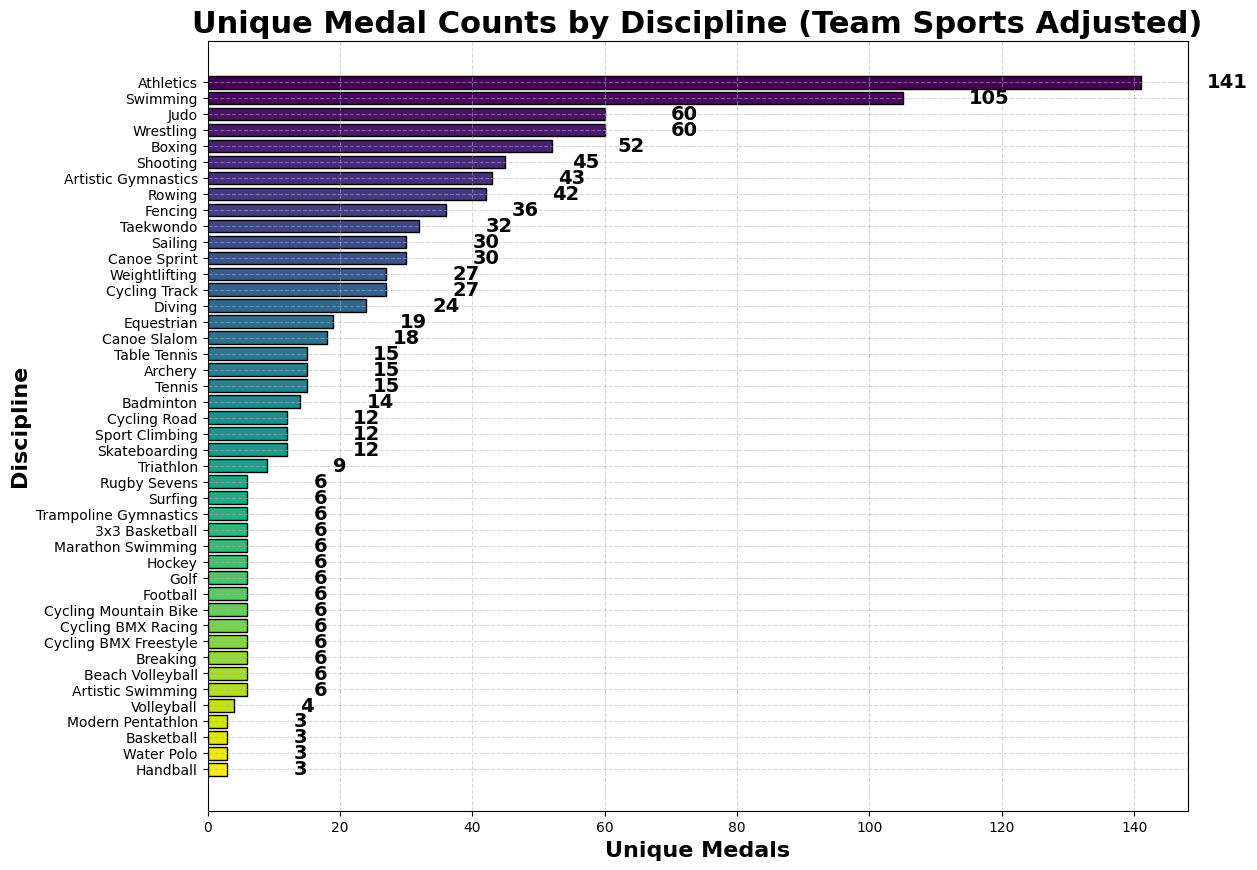

In [39]:
# Identify team sports by creating a list of disciplines that involve teams
team_sports = ['Basketball', 'Volleyball', 'Football', 'Hockey', 'Rowing', 'Canoe Sprint']  # Add other team sports as needed

# Create a new dataframe to work with
unique_medals_df = medallists_df.copy()

# For team sports, drop duplicates by event, country, and medal type to count only one medal per team
unique_medals_df['is_team_sport'] = unique_medals_df['discipline'].isin(team_sports)
unique_medals_df = unique_medals_df.drop_duplicates(subset=['discipline', 'event', 'country', 'medal_type'], keep='first')

# Group by discipline to count the unique medals
unique_discipline_medal_count = unique_medals_df.groupby('discipline')['medal_type'].count().reset_index()
unique_discipline_medal_count.columns = ['Discipline', 'Unique Medals']

# Sorting disciplines by unique medals in descending order
unique_discipline_medal_count = unique_discipline_medal_count.sort_values(by='Unique Medals', ascending=False)

# Plotting the unique medals by discipline
plt.figure(figsize=(14, 10))

# Generate color map based on number of unique medals
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_discipline_medal_count)))

# Plotting the unique medals by discipline with color variation
plt.figure(figsize=(14, 10))
bars = plt.barh(unique_discipline_medal_count['Discipline'],
                unique_discipline_medal_count['Unique Medals'],
                color=colors, edgecolor='black')

# Enhancing the title and labels
plt.title('Unique Medal Counts by Discipline (Team Sports Adjusted)', fontsize=22, fontweight='bold')
plt.xlabel('Unique Medals', fontsize=16, fontweight='bold')
plt.ylabel('Discipline', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Adding the number of unique medals as labels on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', fontsize=14, fontweight='bold', color='black')

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting the plot margins
plt.subplots_adjust(left=0.25, right=0.95)

plt.show()


**Top 10 Countries by Total medals**

The bar chart below shows the top 10 countries by total medal count, with the United States (USA), China (CHN), and Australia (AUS) leading the tally.

<ipython-input-12-1585392dece4>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


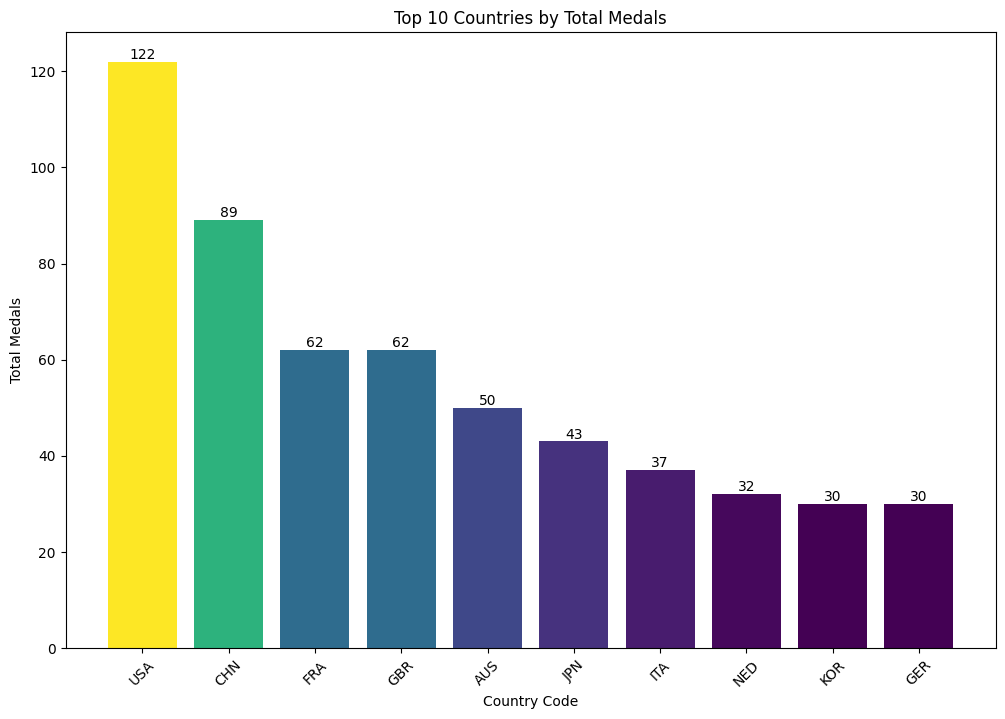

In [12]:
# Sort countries by total medals and select the top 10
top_10_countries = medals_total_df.sort_values(by='Total', ascending=False).head(10)

colors = []
cmap = get_cmap('viridis')
# scale data
denominator = max(top_10_countries['Total']) - min(top_10_countries['Total'])
scaled_data = [(datum-min(top_10_countries['Total']))/denominator for datum in top_10_countries['Total']]
for decimal in scaled_data:
    colors.append(cmap(decimal))

# Plotting the top 10 countries by total medals
plt.figure(figsize=(12, 8))
plt.bar(top_10_countries['country_code'], top_10_countries['Total'], color=colors)
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Country Code')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0])
plt.show()

**Medal Breakdown for the Top 10 countries**

Next, we will explore the breakdown of gold, silver, and bronze medals among these top-performing countries. This will help us understand not only the quantity but also the quality of medals won by these nations.

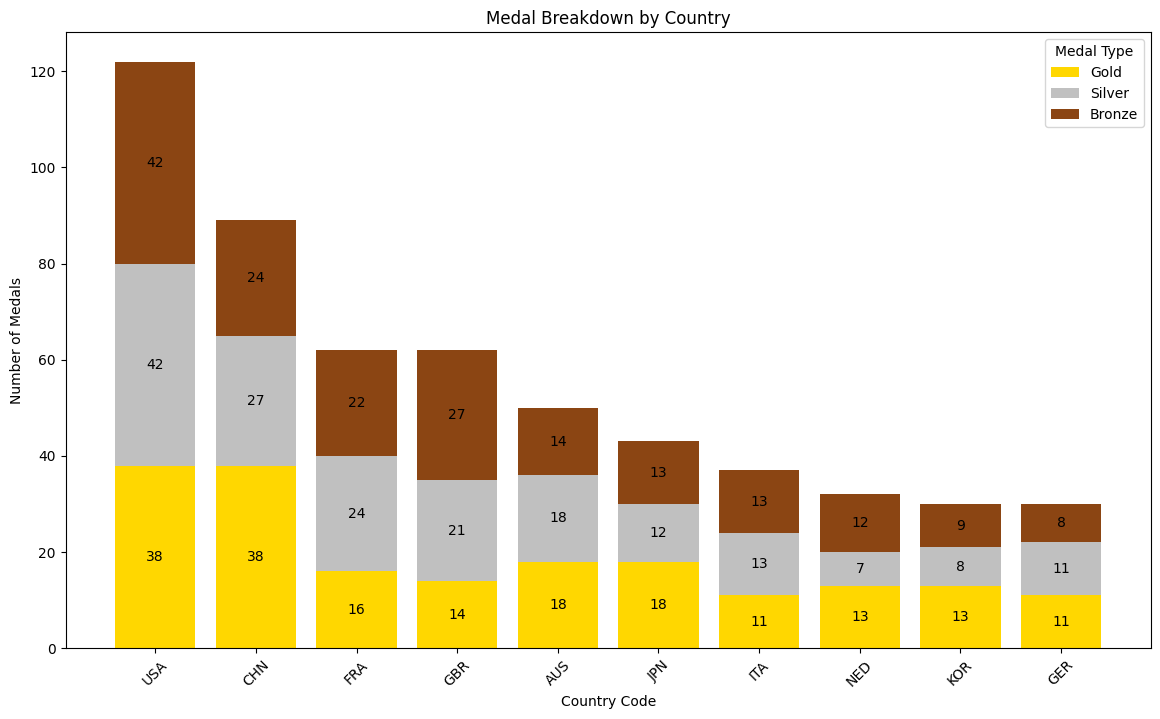

In [20]:
# Plotting the breakdown of medal types for the top 10 countries
plt.figure(figsize=(14, 8))

# Stacked bar chart
bars_gold = plt.bar(top_10_countries['country_code'], top_10_countries['Gold Medal'], label='Gold', color='gold')
bars_silver = plt.bar(top_10_countries['country_code'], top_10_countries['Silver Medal'],
                      bottom=top_10_countries['Gold Medal'], label='Silver', color='silver')
bars_bronze = plt.bar(top_10_countries['country_code'],
                      top_10_countries['Bronze Medal'],
                      bottom=top_10_countries['Gold Medal'] + top_10_countries['Silver Medal'],
                      label='Bronze', color='saddlebrown')

plt.title('Medal Breakdown by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.xticks(rotation=45)

# Adding labels to each bar
plt.bar_label(bars_gold, label_type='center')
plt.bar_label(bars_silver, label_type='center')
plt.bar_label(bars_bronze, label_type='center')

plt.show()


**Top 10 countries by athletes contribution**

The horizontal bar chart shows the top 10 athletes from the top 10 nations by the total number of medals won.

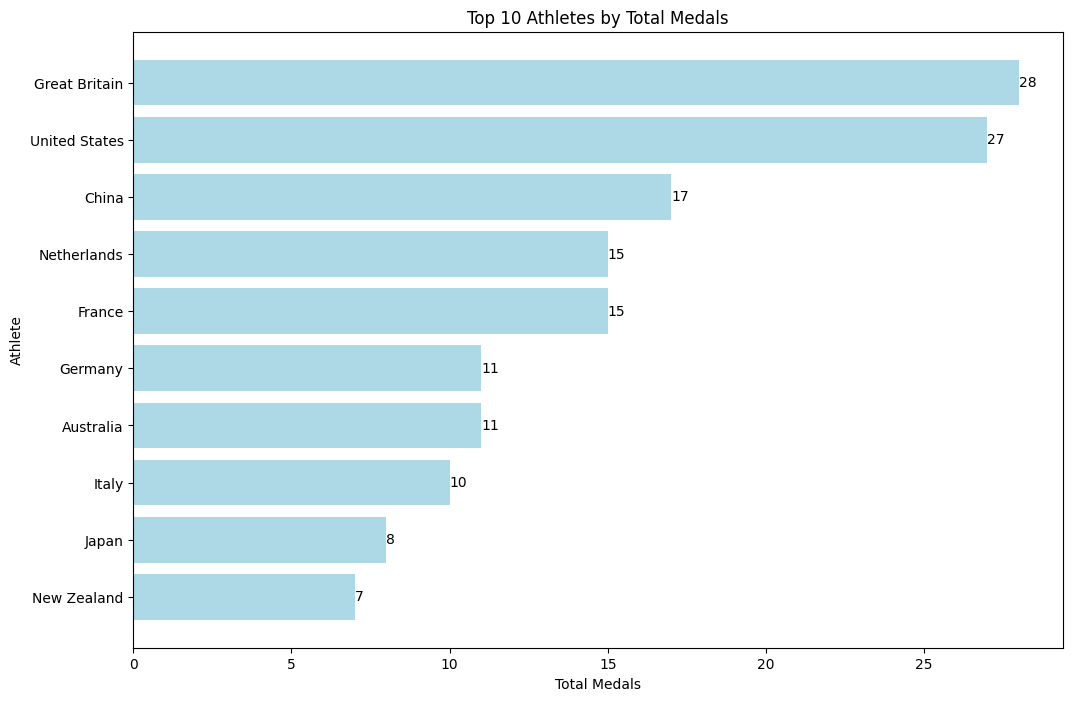

In [47]:
# Grouping by athlete name and counting their medals
athlete_medal_count = medals_df.groupby('name')['medal_type'].count().reset_index()
athlete_medal_count.columns = ['Athlete', 'Total Medals']

# Selecting top 10 athletes with the most medals
top_10_athletes = athlete_medal_count.sort_values(by='Total Medals', ascending=False).head(10)

# Plotting the top 10 athletes by total medals
plt.figure(figsize=(12, 8))
plt.barh(top_10_athletes['Athlete'], top_10_athletes['Total Medals'], color='lightblue')
plt.title('Top 10 Athletes by Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Athlete')
plt.gca().invert_yaxis()
plt.bar_label(plt.gca().containers[0])
plt.show()

**Top 10 Athletes by Total Medal and Gold Medal Counts**

Identify the top 10 athletes by total medals and gold medals within these top-performing countries.

****

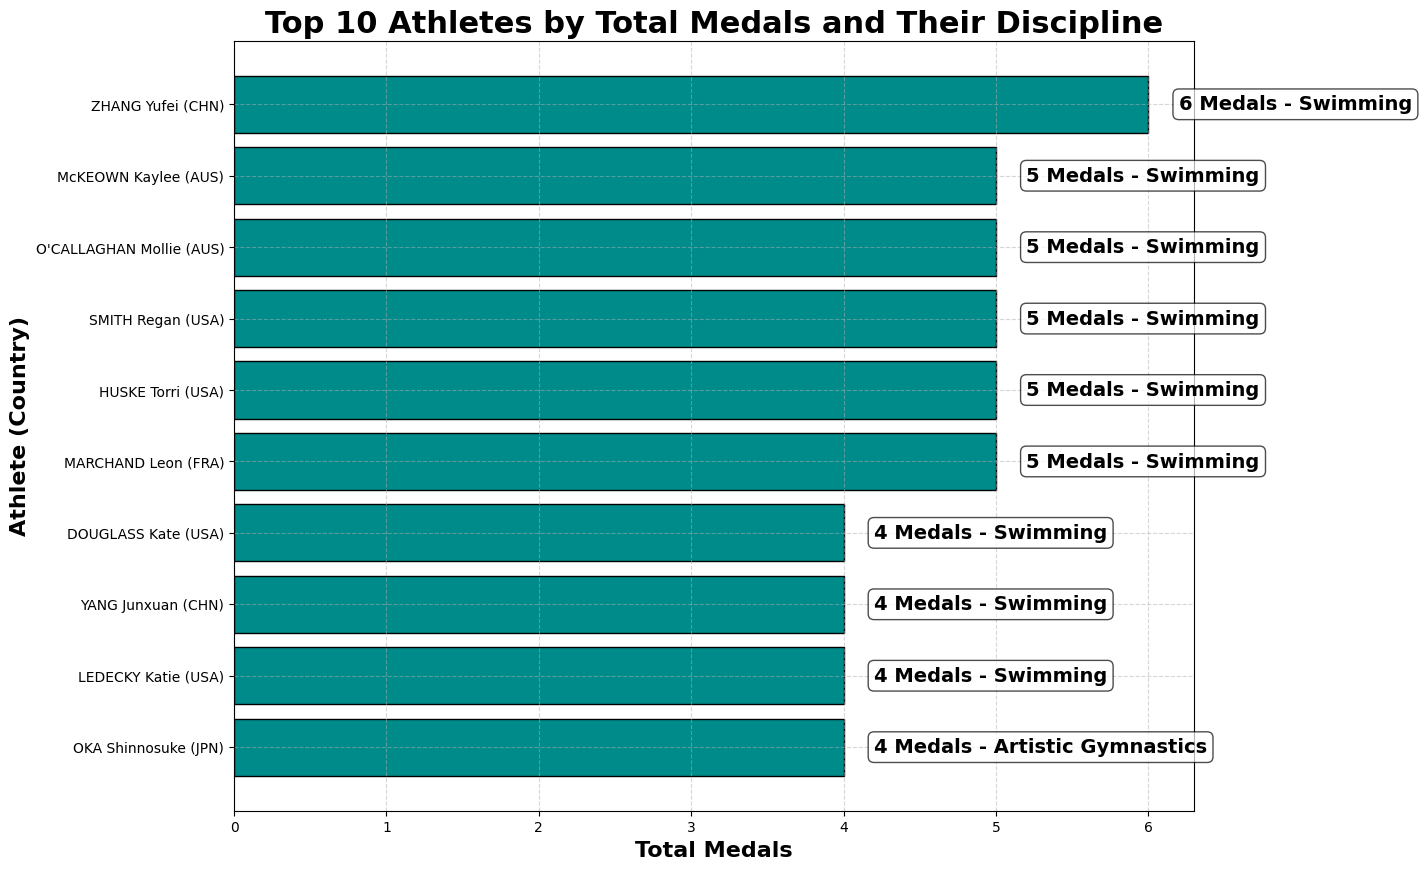

In [55]:
import matplotlib.pyplot as plt

# Plotting the top 10 athletes by total medals and discipline with enhanced visibility for athlete names
plt.figure(figsize=(16, 10))

# Making the bars wider and the names more readable
bars = plt.barh(top_10_athletes_with_discipline['Athlete'] + ' (' + top_10_athletes_with_discipline['Country Code'] + ')',
                top_10_athletes_with_discipline['Total Medals'], color='darkcyan', edgecolor='black', height=0.8)

# Enhancing the title and labels
plt.title('Top 10 Athletes by Total Medals and Their Discipline', fontsize=22, fontweight='bold')
plt.xlabel('Total Medals', fontsize=16, fontweight='bold')
plt.ylabel('Athlete (Country)', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Adding the number of medals and discipline as labels on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())} Medals - {top_10_athletes_with_discipline.iloc[index]["Discipline"]}',
             va='center', ha='left', fontsize=14, fontweight='bold', color='black',
             bbox=dict(facecolor='white', alpha=0.7, boxstyle="round,pad=0.3"))

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Ensure the labels are fully visible by adjusting the plot margins
plt.subplots_adjust(left=0.35, right=0.95)

plt.show()


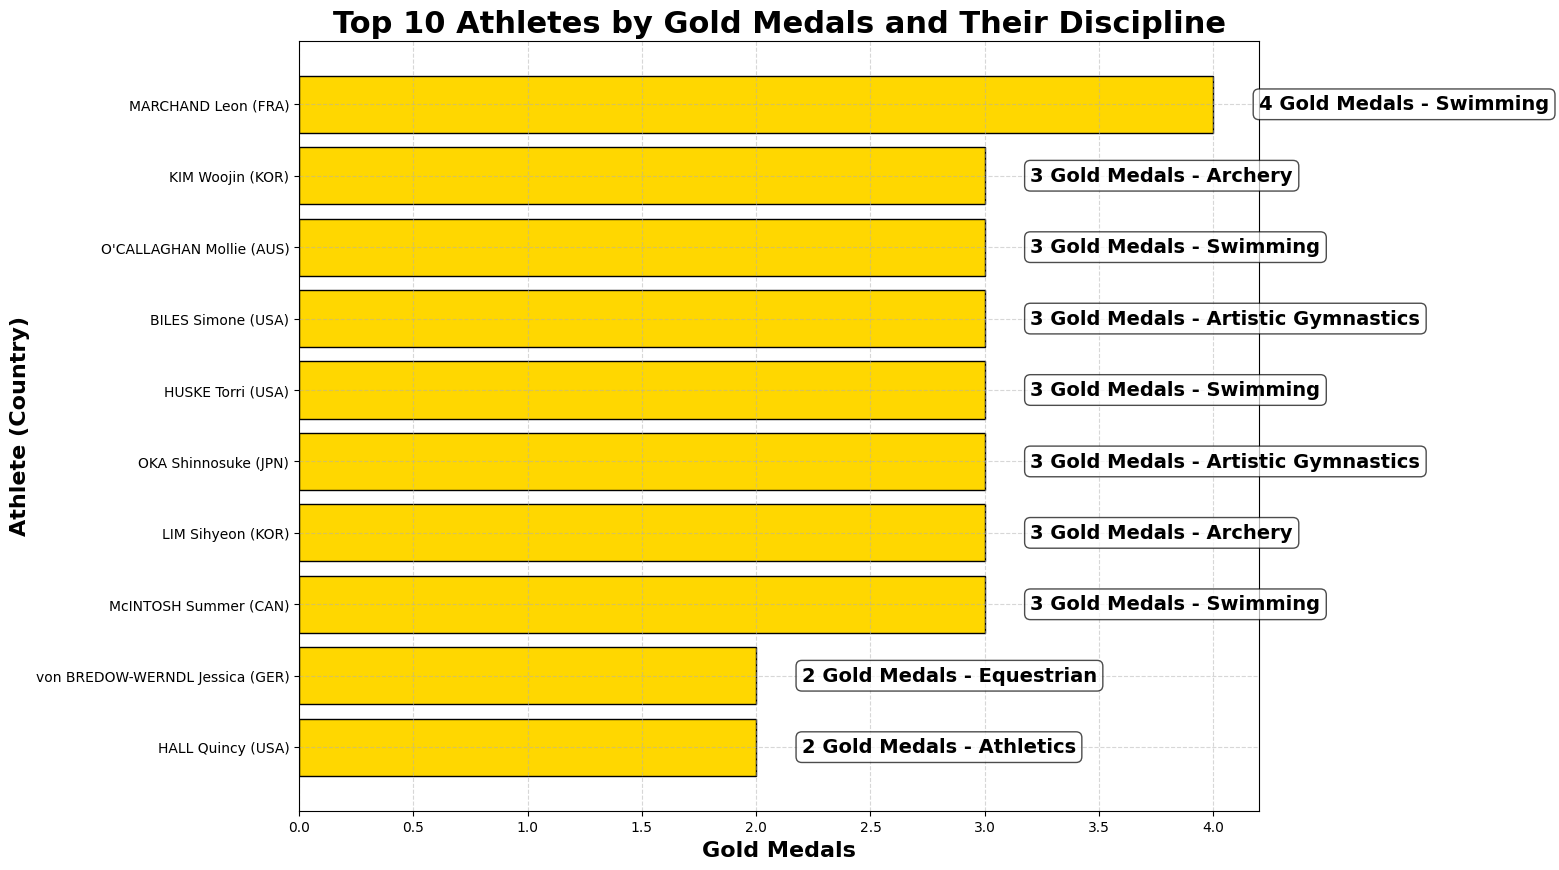

In [33]:
import matplotlib.pyplot as plt

# Filtering the dataset for only Gold Medals
gold_medals_df = medallists_df[medallists_df['medal_type'] == 'Gold Medal']

# Grouping by athlete name, country code, and discipline to count gold medals
athlete_gold_medal_discipline_count = gold_medals_df.groupby(['name', 'country_code', 'discipline'])['medal_type'].count().reset_index()
athlete_gold_medal_discipline_count.columns = ['Athlete', 'Country Code', 'Discipline', 'Gold Medals']

# Sorting athletes by gold medals and selecting the top 10
top_10_athletes_gold = athlete_gold_medal_discipline_count.sort_values(by='Gold Medals', ascending=False).head(10)

# Plotting the top 10 athletes by gold medals and discipline with enhanced visibility for athlete names
plt.figure(figsize=(16, 10))

# Making the bars wider and the names more readable
bars = plt.barh(top_10_athletes_gold['Athlete'] + ' (' + top_10_athletes_gold['Country Code'] + ')',
                top_10_athletes_gold['Gold Medals'], color='gold', edgecolor='black', height=0.8)

# Enhancing the title and labels
plt.title('Top 10 Athletes by Gold Medals and Their Discipline', fontsize=22, fontweight='bold')
plt.xlabel('Gold Medals', fontsize=16, fontweight='bold')
plt.ylabel('Athlete (Country)', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Adding the number of gold medals and discipline as labels on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())} Gold Medals - {top_10_athletes_gold.iloc[index]["Discipline"]}',
             va='center', ha='left', fontsize=14, fontweight='bold', color='black',
             bbox=dict(facecolor='white', alpha=0.7, boxstyle="round,pad=0.3"))

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Ensure the labels are fully visible by adjusting the plot margins
plt.subplots_adjust(left=0.35, right=0.95)

plt.show()


**Distribution Between the Number of Athletes and Medals Won by Country**




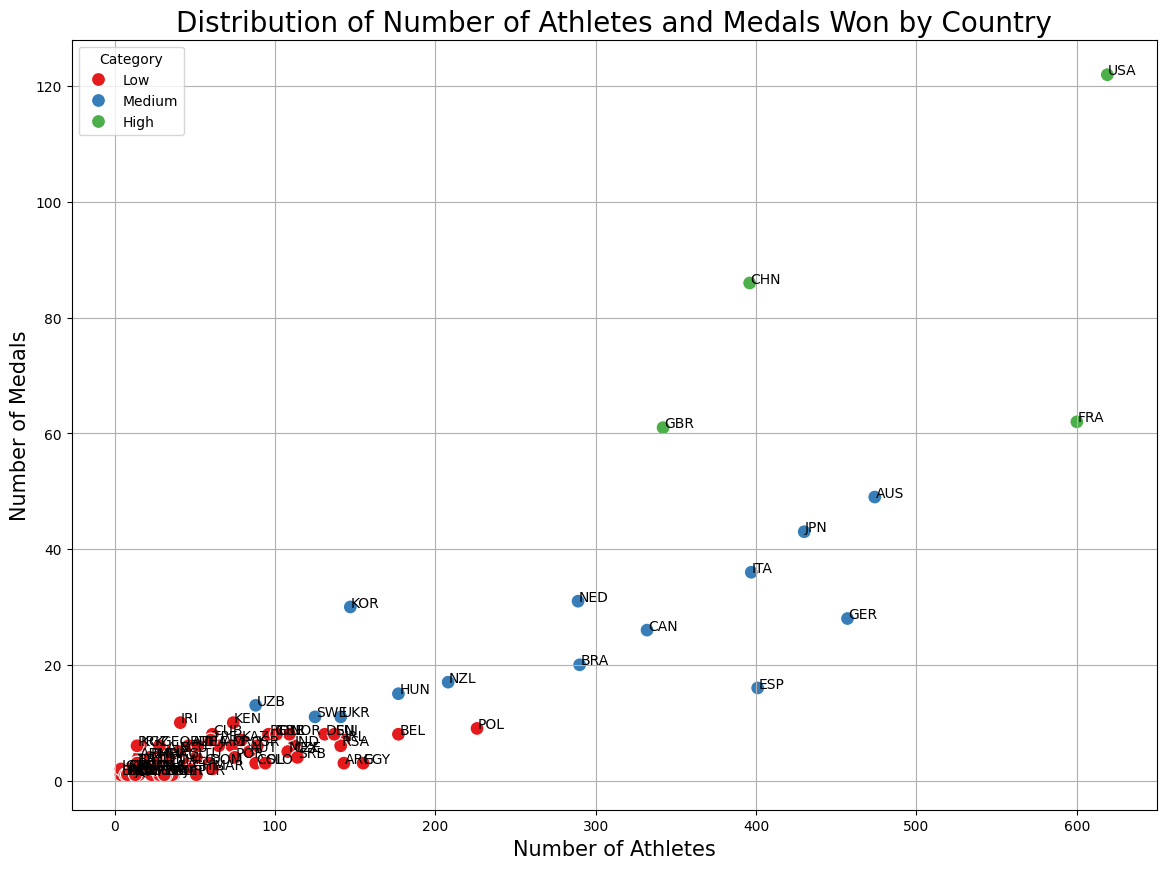

In [73]:
import seaborn as sns

# Remove duplicates for team sports, considering one medal per team
team_sports = ['Basketball', 'Volleyball', 'Football', 'Hockey', 'Rowing', 'Canoe Sprint']  # Add other team sports as needed
medals_df_cleaned = medallists_df.copy()
medals_df_cleaned['is_team_sport'] = medals_df_cleaned['discipline'].isin(team_sports)
medals_df_cleaned = medals_df_cleaned.drop_duplicates(subset=['discipline', 'event', 'country', 'medal_type'], keep='first')

# Sum up the total number of medals won by each country
medals_per_country = medals_df_cleaned.groupby('country_code')['medal_type'].count().reset_index()
medals_per_country.columns = ['Country Code', 'Number of Medals']

# Count the number of unique athletes representing each country
athletes_per_country = athletes_df.groupby('country_code')['name'].nunique().reset_index()
athletes_per_country.columns = ['Country Code', 'Number of Athletes']

# Merge the data on number of athletes and number of medals
athletes_medals_df = pd.merge(athletes_per_country, medals_per_country, on='Country Code')

# Categorize countries based on the number of medals won
athletes_medals_df['Category'] = pd.cut(athletes_medals_df['Number of Medals'],
                                        bins=[0, 10, 50, athletes_medals_df['Number of Medals'].max()],
                                        labels=['Low', 'Medium', 'High'])

# Plot the data with color-coded categories
plt.figure(figsize=(14, 10))
sns.scatterplot(data=athletes_medals_df, x='Number of Athletes', y='Number of Medals', hue='Category', s=100, palette='Set1')

# Annotate each point with the country code
for i in range(athletes_medals_df.shape[0]):
    plt.text(athletes_medals_df['Number of Athletes'][i] + 0.5,
             athletes_medals_df['Number of Medals'][i],
             athletes_medals_df['Country Code'][i],
             fontsize=10)

plt.title('Distribution of Number of Athletes and Medals Won by Country', fontsize=20)
plt.xlabel('Number of Athletes', fontsize=15)
plt.ylabel('Number of Medals', fontsize=15)
plt.grid(True)
plt.show()


**Correlation Between the Number of Athletes and Medals Won by TOP 10 Countries**

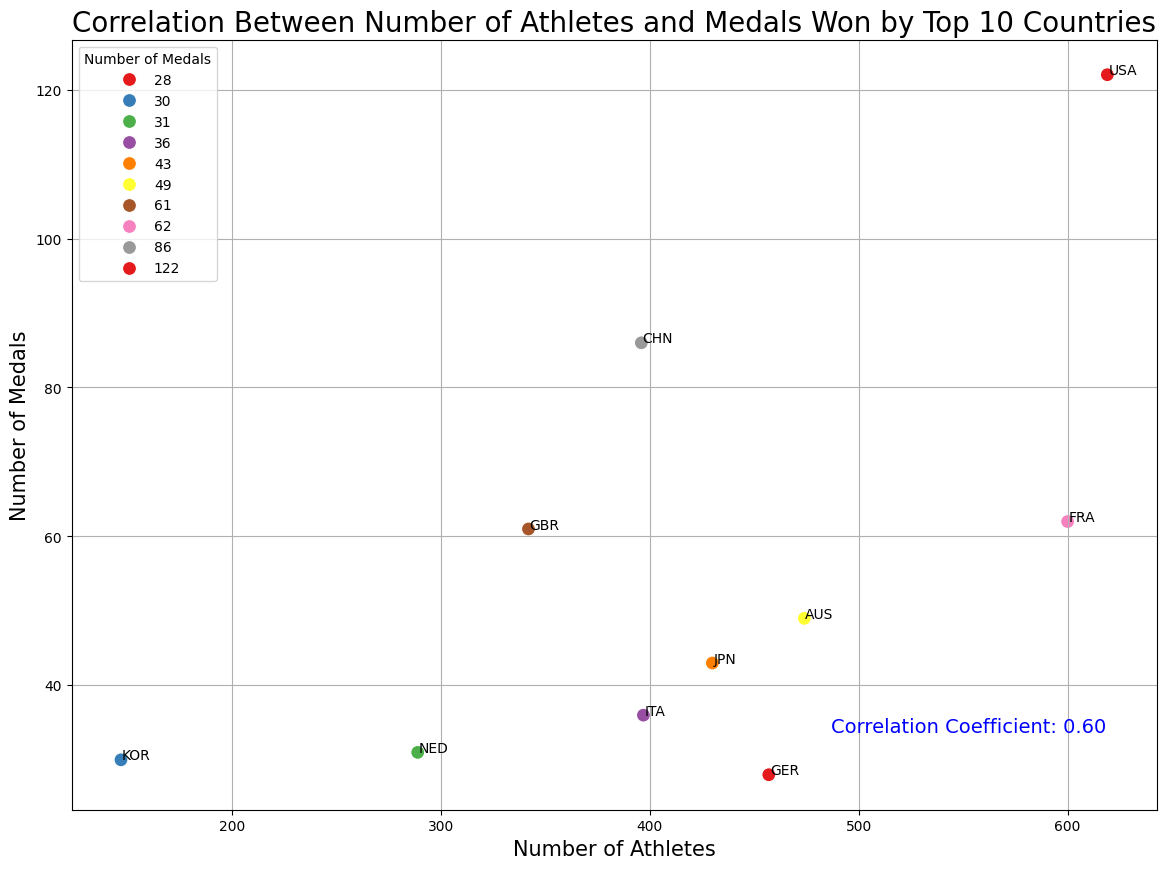

Correlation Coefficient between Number of Athletes and Medals Won (Top 10 Countries): 0.60


In [72]:
import seaborn as sns

# Remove duplicates for team sports, considering one medal per team
team_sports = ['Basketball', 'Volleyball', 'Football', 'Hockey', 'Rowing', 'Canoe Sprint']  # Add other team sports as needed
medals_df_cleaned = medallists_df.copy()
medals_df_cleaned['is_team_sport'] = medals_df_cleaned['discipline'].isin(team_sports)
medals_df_cleaned = medals_df_cleaned.drop_duplicates(subset=['discipline', 'event', 'country', 'medal_type'], keep='first')

# Sum up the total number of medals won by each country
medals_per_country = medals_df_cleaned.groupby('country_code')['medal_type'].count().reset_index()
medals_per_country.columns = ['Country Code', 'Number of Medals']

# Count the number of unique athletes representing each country
athletes_per_country = athletes_df.groupby('country_code')['name'].nunique().reset_index()
athletes_per_country.columns = ['Country Code', 'Number of Athletes']

# Merge the data on number of athletes and number of medals
athletes_medals_df = pd.merge(athletes_per_country, medals_per_country, on='Country Code')

# Step 1: Filter for Top 10 Countries based on the total number of medals
top_10_countries = athletes_medals_df.nlargest(10, 'Number of Medals')

# Step 2: Calculate the correlation coefficient for these top 10 countries
correlation_coefficient_top_10 = top_10_countries['Number of Athletes'].corr(top_10_countries['Number of Medals'])


# Step 3: Plot the data with color-coded categories
plt.figure(figsize=(14, 10))
sns.scatterplot(data=top_10_countries, x='Number of Athletes', y='Number of Medals', hue='Number of Medals', s=100, palette='Set1')

# Annotate each point with the country code
# Iterate over the rows of the DataFrame using iterrows()
for index, row in top_10_countries.iterrows():
    plt.text(row['Number of Athletes'] + 0.5,
             row['Number of Medals'],
             row['Country Code'],
             fontsize=10)


# Annotate the correlation coefficient on the plot
plt.annotate(f'Correlation Coefficient: {correlation_coefficient_top_10:.2f}',
             xy=(0.7, 0.1), xycoords='axes fraction', fontsize=14, color='blue')

plt.title('Correlation Between Number of Athletes and Medals Won by Top 10 Countries', fontsize=20)
plt.xlabel('Number of Athletes', fontsize=15)
plt.ylabel('Number of Medals', fontsize=15)
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f'Correlation Coefficient between Number of Athletes and Medals Won (Top 10 Countries): {correlation_coefficient_top_10:.2f}')
